## Visibility Filtering in Cylindrical Space
Name: Divya Natekar

Net ID: dyn2009

NYU ID: N19974330
### What this program covers:
Through this program, we can observe how a scanner sitting at a fixed origin would sweep through the space, while detecting which points are visible, and which are hidden behind foreground occlusions.

The goal here was to establish:
- A scanner placed at a corner (e.g., bottom-right of a point cloud block).
- A field-of-view behavior based on angular spread, similar to how actual LiDARs emit laser beams in a cone.
- A process to retain visible points and exclude those occluded based on angle and distance.

#### i. Importing the necessary libraries:

In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


#### ii. Loading the reduced dataset:

In [23]:
# Load the 'reduced' sheet from your Google Sheet using public CSV export
url = 'https://docs.google.com/spreadsheets/d/1io-mxKbNpP8YIhzwwsWFRvGTvry2Ao0j/export?format=csv&gid=836186177'

# Read data directly from the sheet
df = pd.read_csv(url)

# Use only the first point cloud: 'x' and 'y'
df = df[['x', 'y']].copy()
df.columns = ['X', 'Y']  # Rename for consistency with the rest of the code

# Convert to numeric, force errors to NaN (and drop them)
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df = df.dropna(subset=['X', 'Y']).reset_index(drop=True)


#### iii. Sorting the data by X and then by Y:

In [24]:
# Sort the data by X first, then by Y
df_sorted = df.sort_values(by=['X', 'Y']).reset_index(drop=True)


#### iv. Finding Y max where X = 0:

In [25]:
# Find Y value where X is closest to 0 (safe fallback if X=0 is missing)
x_closest = df_sorted.iloc[(df_sorted['X'] - 0).abs().argsort()[:1]]
ymax = x_closest['Y'].values[0]
print(f"Ymax where X is closest to 0: {ymax}")


Ymax where X is closest to 0: 0.0


#### v. Filtering the data where Y < 0 or Y > Y max:

In [26]:
# Filter out points where Y is less than 0 or greater than Ymax
excluded = df_sorted[(df_sorted['Y'] < 0) | (df_sorted['Y'] > ymax)].copy()
remaining = df_sorted[(df_sorted['Y'] >= 0) & (df_sorted['Y'] <= ymax)].copy()


#### vi. Plotting the remaining and excluded data:

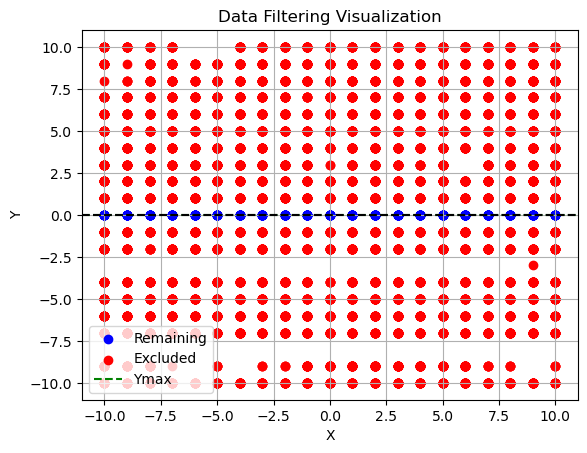

In [27]:
# Visualize the included (remaining) and excluded points
plt.scatter(remaining['X'], remaining['Y'], color='blue', label='Remaining')
plt.scatter(excluded['X'], excluded['Y'], color='red', label='Excluded')
plt.axhline(y=ymax, color='green', linestyle='--', label='Ymax')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('Data Filtering Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


#### vii. Input theta and calculating the X top / X bot:

In [28]:
# Take user input for field of view (in degrees) and calculate opposite side
theta_deg = float(input("Enter field of view angle (in degrees, e.g., 22.5): "))
theta_rad = math.radians(theta_deg)

Xtop = ymax * math.tan(theta_rad)
Xbot = -Xtop

print(f"Opposite leg values based on theta = {theta_deg} degrees:")
print(f"Xtop = {Xtop}")
print(f"Xbot = {Xbot}")


Enter field of view angle (in degrees, e.g., 22.5):  22.5


Opposite leg values based on theta = 22.5 degrees:
Xtop = 0.0
Xbot = -0.0
